In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

df = pd.read_csv("hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df['is_canceled'].value_counts()

,count
is_canceled,
0,75166
1,44224


In [ ]:
import matplotlib.pyplot as plt

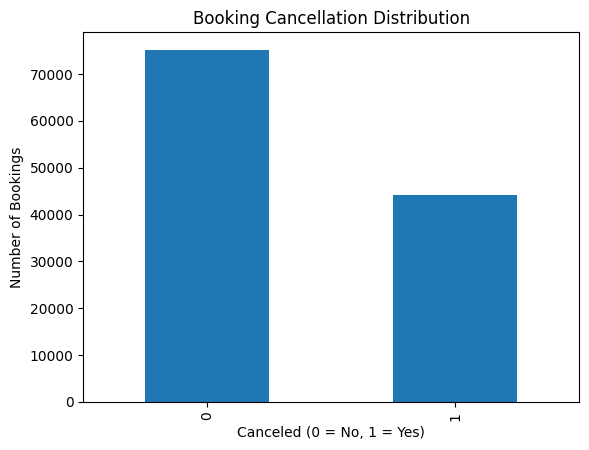

In [ ]:
df['is_canceled'].value_counts().plot(kind='bar')
plt.xlabel("Canceled (0 = No, 1 = Yes)")
plt.ylabel("Number of Bookings")
plt.title("Booking Cancellation Distribution")
plt.show()

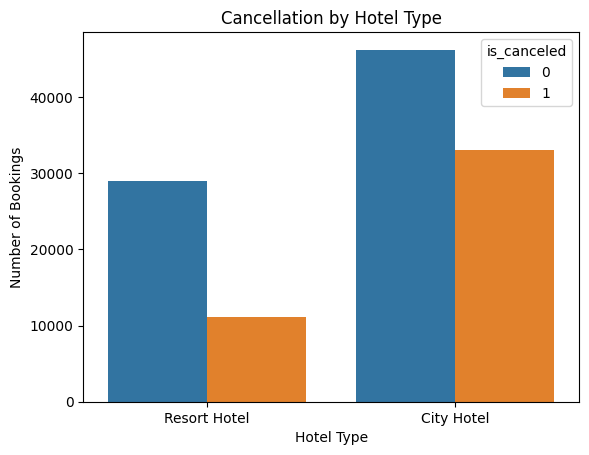

In [ ]:
import seaborn as sns

sns.countplot(data=df, x='hotel', hue='is_canceled')
plt.xlabel("Hotel Type")
plt.ylabel("Number of Bookings")
plt.title("Cancellation by Hotel Type")
plt.show()

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
company,112593
agent,16340
country,488
children,4
arrival_date_month,0
arrival_date_week_number,0
hotel,0
is_canceled,0
stays_in_weekend_nights,0
arrival_date_day_of_month,0


In [ ]:
df['children'] = df['children'].fillna(0)
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
country,488
hotel,0
lead_time,0
is_canceled,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
arrival_date_year,0
stays_in_weekend_nights,0
stays_in_week_nights,0


In [ ]:
df = df.drop(columns=[
    'reservation_status',
    'reservation_status_date'
])

In [ ]:
df.shape

(119390, 30)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int64  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
corr_target = df.corr()['is_canceled'].sort_values(ascending=False)
corr_target

,is_canceled
is_canceled,1.000000
deposit_type,0.468634
lead_time,0.293123
country,0.264223
distribution_channel,0.167600
previous_cancellations,0.110133
adults,0.060017
market_segment,0.059338
days_in_waiting_list,0.054186
adr,0.047557


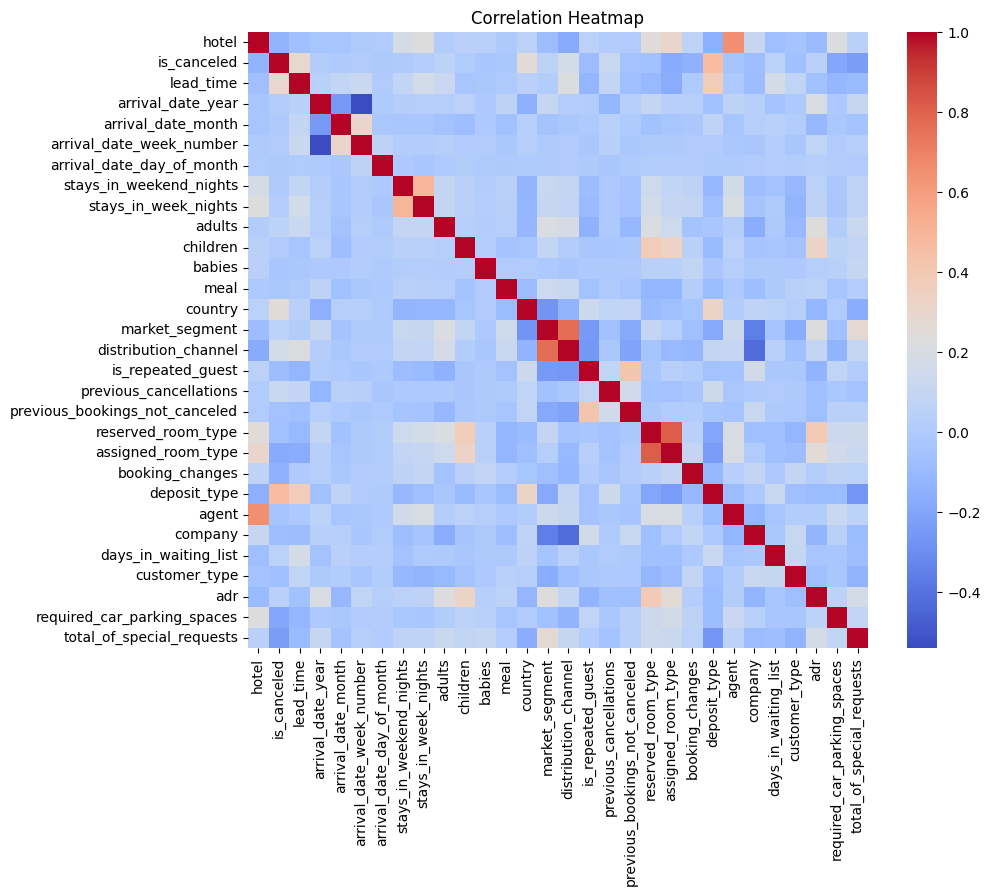

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [ ]:
X_train.shape, X_test.shape

((83573, 29), (35817, 29))